Example notebook for the Young Stellar Objects metric. 
Please contact Loredo Prisidano for more information about the details of the metric. 

The basic premise is to count how many young stellar objects above a SNR cut in g,r, and i bands are available in the coadded images. Dust extinction and distance modulus are taken into account, when searching for stars above a given absolute magnitude. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline


In [2]:
baseline_file = get_baseline()
run_name = os.path.basename(baseline_file).replace('.db','')
outDir = "temp"
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
# Set up YSO metric - which counts the number of expected young stellar objects detectable with Rubin

nside = 64
bundleList = []
sql = ""
# Let's plug in the magnitudes for one type
metric = maf.mafContrib.NYoungStarsMetric()

print("Metric is looking for YSO with the following absolute magnitudes", metric.mags)

slicer = maf.slicers.HealpixSlicer(nside=nside, useCache=False)

summaryStats = [maf.metrics.SumMetric(), maf.metrics.MaxMetric()]
plotDict = {"logScale": True, 'figsize': (8, 6), "colorMin": 1, #"colorMax":1e5, 
            "cbarFormat":'%.0e'}
bundleList.append(
    maf.metricBundles.MetricBundle(
        metric, slicer, sql, plotDict=plotDict, summaryMetrics=summaryStats, runName=run_name
    )
)

Metric is looking for YSO with the following absolute magnitudes {'g': 10.32, 'r': 9.28, 'i': 7.37}
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying table None with no constraint for columns ['fiveSigmaDepth', 'rotSkyPos', 'fieldDec', 'filter', 'fieldRA'].
Found 2086980 visits
Running:  ['baseline_v2_0_10yrs_young_stars_HEAL']
Read map /Users/lynnej/rubin_sim_data/maps/DustMaps3d/merged_ebv3d_nside64_defaults.fits from disk


0.0 180.0 -180.0 180.0


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 4287 bins, returning 200
  warnings.warn(


Plotting complete.


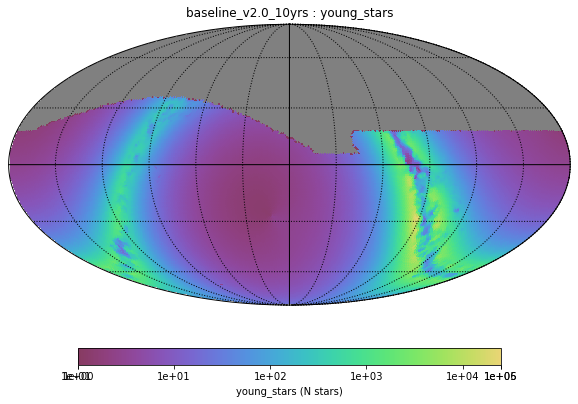

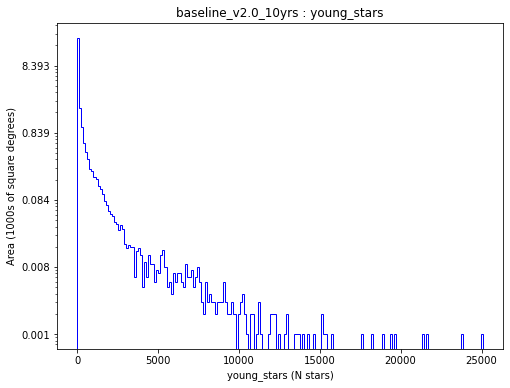

In [4]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [6]:
pd.DataFrame([bd[k].summaryValues for k in bd], index=list(bd.keys()))

,Sum,Max
baseline_v2_0_10yrs_young_stars_HEAL,8.080644e+06,25094.763348


In [7]:
print(np.sum(b.metricValues.compressed()), 
      np.median(b.metricValues.compressed()), np.mean(b.metricValues.compressed()), 
      np.max(b.metricValues.compressed()), np.min(b.metricValues.compressed()), 
      np.std(b.metricValues.compressed()))

8080644.063704959 14.465271855702918 239.6750426725481 25094.763347506447 1.4378046017382751e-09 906.0931492890604
